<a href="https://colab.research.google.com/github/HarshAhalpara-001/Complete_MachineLearning/blob/main/Supervise_Learning/Logistic_Classifiaction/Logistic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
digits = load_digits()
X,y=digits.data,digits.target # 8*8 pixel image
X.shape,y.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

0


<Figure size 640x480 with 0 Axes>

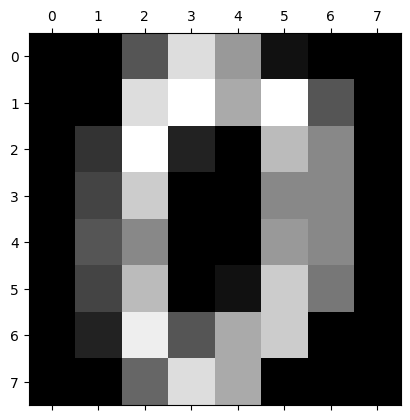

In [4]:
plt.gray()
plt.matshow(digits.images[0])
print(digits.target[0])
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True, # to add bias term in equation or not
                        multi_class='multinomial', # options : auto,ovr,binary,multinomial read it if you dont know
                        penalty='l2', # ridge(l2) and lasso(l1)
                        solver='saga', # saga is a solver suitable for large datasets and supports both l1 and l2 regularization.
                        max_iter=10000,
                        C=50 # C is the regularization parameter where a smaller value indicates stronger regularization, and a larger value indicates weaker regularization.
                           )
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=50, max_iter=10000, multi_class='multinomial',
                   solver='saga')

(64,)
[6] 6


<Figure size 640x480 with 0 Axes>

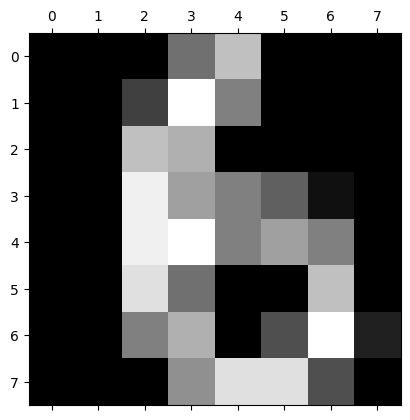

In [7]:
plt.gray()
print(X_test[0].shape)
plt.matshow(X_test[0].reshape(8, 8))
print(model.predict(X_test[0].reshape(1,-1)),y_test[0])
plt.show()

0.9722222222222222


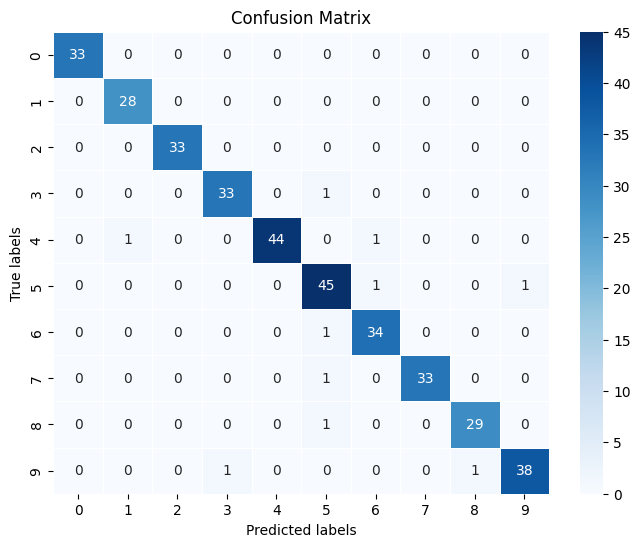

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,model.predict(X_test))
print(accuracy_score(y_test,model.predict(X_test)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()